# Lecture 1106: Reading in Excel files

In [ ]:
import pandas as pd

## pd.read_excel()

## Download data

On November 6, 2023, I downloaded two files from Cal-Access:
- `prop31_yes.xls` from [YES ON PROPOSITION 31](https://cal-access.sos.ca.gov/Campaign/Committees/Detail.aspx?id=1436431&session=2021&view=received) using the download link that says "DOWNLOAD THESE RESULTS: MICROSOFT EXCEL"
- `prop31_no.xls` from [NO ON PROPOSITION 31](https://cal-access.sos.ca.gov/Campaign/Committees/Detail.aspx?id=1431407&session=2021&view=received) using the download link that says "DOWNLOAD THESE RESULTS: MICROSOFT EXCEL"

We're going to use the method [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) to import the data.

In [ ]:
# you will get an error when running this
prop31_no = pd.read_excel('prop31_no.xls')

## Error 1
The error we got was "Excel file format cannot be determined, you must specify an engine manually." Let's go to the [method's documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) and search for `engine`.

```
engine: str, default None
If io is not a buffer or path, this must be set to identify io. Supported engines: “xlrd”, “openpyxl”, “odf”, “pyxlsb”. Engine compatibility :
- “xlrd” supports old-style Excel files (.xls).
- “openpyxl” supports newer Excel file formats.
- “odf” supports OpenDocument file formats (.odf, .ods, .odt).
- “pyxlsb” supports Binary Excel files.
```

This is a .xls file, so we should use the `xlrd` engine.

In [ ]:
# you will STILL get an error when running this
prop31_no = pd.read_excel('prop31_no.xls', engine='xlrd')

## Error 2

The error I got here was "Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd."

So, let's `pip install xlrd`. 

In [ ]:
pip install xlrd

In [ ]:
# you will STILL get an error when running this
prop31_no = pd.read_excel('prop31_no.xls', engine='xlrd')

## Error 3
I still got an error! The error I got was: "Unsupported format, or corrupt file: Expected BOF record; found b'"NAME OF'"

OK, so does anyone know what the problem is?

If you have Excel on your computer, try opening up the file.

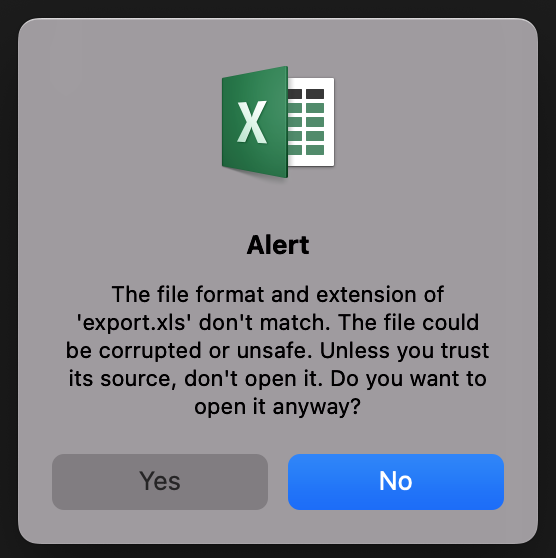

(The above screenshot is just an example — the file name will be different.)

Something is wrong with this file. So when I got that alert, I hit "Yes" then saved the file in Excel as a `.xlsx` file.

## Try importing again

In [ ]:
# we'll change the engine since `xlrd` doesn't support .xlsx files
prop31_no = pd.read_excel('prop31_no.xlsx', engine='openpyxl')

ARGH: "ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl."

### Install openpyxl

In [ ]:
pip install openpyxl

## FINALLY, import data

In [ ]:
prop31_no = pd.read_excel('prop31_no.xlsx', engine='openpyxl')

Yay, that worked! Let's see what's inside and be sure to export a CSV of this!!!

## Explore and export

In [ ]:
prop31_no

In [ ]:
data.info()

Just exploring a bit...

In [ ]:
prop31_no[prop31_no['NAME OF CONTRIBUTOR'] == 'PHILIP MORRIS USA INC. AND ITS AFFILIATES']

In [ ]:
prop31_no['TRANSACTION DATE'].min()

In [ ]:
prop31_no['TRANSACTION DATE'].max()

Anything you're noticing about the data?

### Re-import the data, typed

In [ ]:
prop31_no = pd.read_excel(
    'prop31_no.xlsx',
    dtype={
        'ZIP': object,
        'ID NUMBER' : object
    },
    engine='openpyxl',
)

In [ ]:
prop31_no

In [ ]:
prop31_no[prop31_no['AMOUNT'] < 0]

### Export

In [ ]:
prop31_no.to_csv('prop31_no.csv', index=False)

## Repeat for `prop31_yes.xlsx`

In [ ]:
prop31_yes = pd.read_excel(
    'prop31_yes.xlsx', 
    dtype={
        'ZIP': object,
        'ID NUMBER' : object
    },
    engine='openpyxl'
)

In [ ]:
prop31_yes

In [ ]:
prop31_yes.info()

In [ ]:
prop31_yes[prop31_yes['AMOUNT'] < 0]

In [ ]:
prop31_yes.to_csv('prop31_yes.csv', index=False)